# **Time Series EDA**

In [35]:
# Install Pandas Data Reader - mainly used for Fiancial Analysis
!pip install --upgrade pandas-datareader

In [36]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [37]:
!pip install yfinance

In [38]:

import yfinance as yf
data = yf.download(tickers = 'TSLA', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,2.312667,2.419333,2.306667,2.400667,2.400667,29449500
2012-03-13,2.434000,2.439333,2.366667,2.406000,2.406000,15024000
2012-03-14,2.400000,2.400000,2.320000,2.352667,2.352667,12772500
2012-03-15,2.352000,2.365333,2.318667,2.333333,2.333333,8574000
2012-03-16,2.326667,2.392667,2.322000,2.354667,2.354667,10939500
2012-03-19,2.350667,2.354667,2.302667,2.332000,2.332000,15234000
2012-03-20,2.332000,2.346667,2.304667,2.330667,2.330667,8505000
2012-03-21,2.329333,2.353333,2.306667,2.343333,2.343333,9108000
2012-03-22,2.331333,2.343333,2.286667,2.293333,2.293333,7836000


In [39]:
type(data)

pandas.core.frame.DataFrame

<Axes: xlabel='Date'>

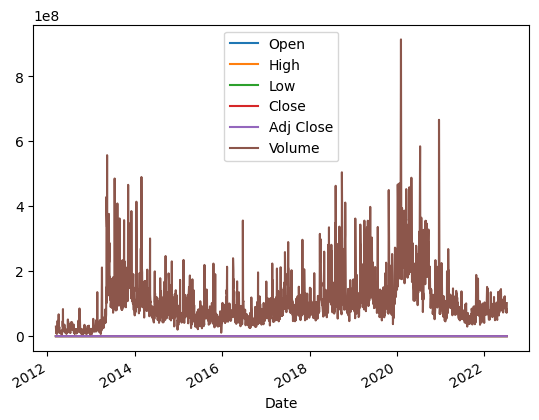

In [40]:
data.plot()

<Axes: xlabel='Date'>

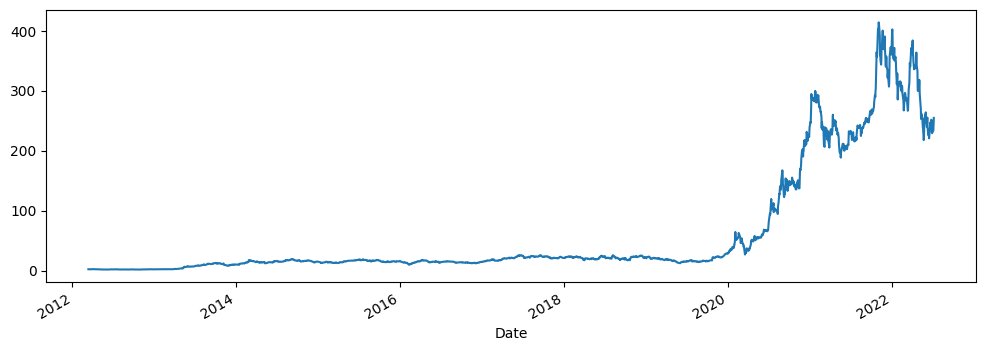

In [41]:
data['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

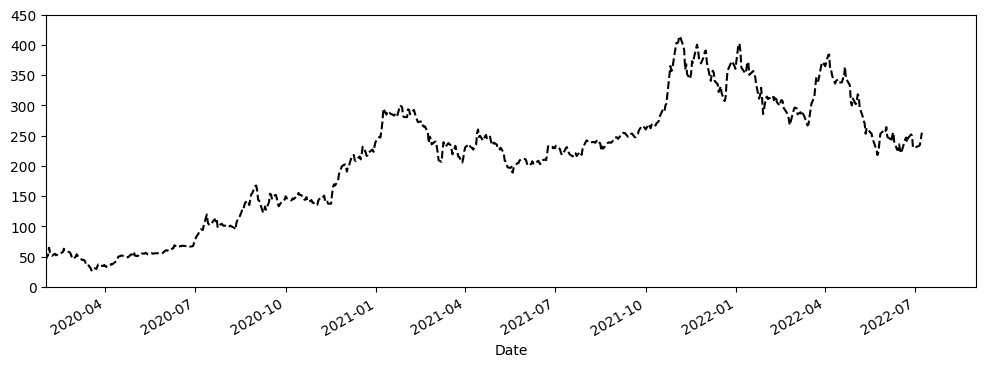

In [42]:
# x and y limit
data['High'].plot(xlim = ['2020-02-01','2022-09-01'],ylim = [0,450],figsize=(12,4), c= 'black',ls='--')

In [44]:
data.index

DatetimeIndex(['2012-03-12', '2012-03-13', '2012-03-14', '2012-03-15',
               '2012-03-16', '2012-03-19', '2012-03-20', '2012-03-21',
               '2012-03-22', '2012-03-23',
               ...
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', length=2599, freq=None)

In [45]:
index = data.loc['2020-02-01':'2022-09-01'].index
share_open = data.loc['2020-02-01':'2022-09-01']['Open']

In [46]:
share_open

Date
2020-02-03     44.912666
2020-02-04     58.863998
2020-02-05     54.883999
2020-02-06     46.661331
2020-02-07     48.703335
                 ...    
2022-07-01    227.000000
2022-07-05    223.000000
2022-07-06    230.779999
2022-07-07    233.919998
2022-07-08    242.333328
Name: Open, Length: 613, dtype: float64

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

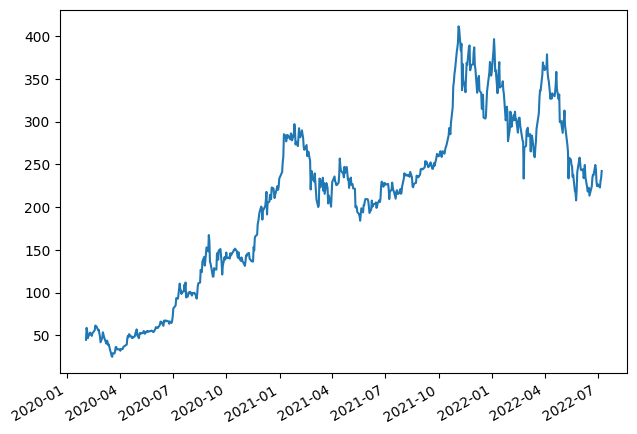

In [48]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() #prevents overlapping
axis.plot(index,share_open)

In [49]:
 # Date-time index
 data = data.reset_index()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599 entries, 0 to 2598
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2599 non-null   datetime64[ns]
 1   Open       2599 non-null   float64       
 2   High       2599 non-null   float64       
 3   Low        2599 non-null   float64       
 4   Close      2599 non-null   float64       
 5   Adj Close  2599 non-null   float64       
 6   Volume     2599 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 142.3 KB


In [51]:
#to convert a data column into date type but is in object type -
pd.to_datetime(data['Date'])

0      2012-03-12
1      2012-03-13
2      2012-03-14
3      2012-03-15
4      2012-03-16
          ...    
2594   2022-07-01
2595   2022-07-05
2596   2022-07-06
2597   2022-07-07
2598   2022-07-08
Name: Date, Length: 2599, dtype: datetime64[ns]

In [55]:
data = data.set_index('Date', drop = True)

In [56]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,2.312667,2.419333,2.306667,2.400667,2.400667,29449500
2012-03-13,2.434000,2.439333,2.366667,2.406000,2.406000,15024000
2012-03-14,2.400000,2.400000,2.320000,2.352667,2.352667,12772500
2012-03-15,2.352000,2.365333,2.318667,2.333333,2.333333,8574000
2012-03-16,2.326667,2.392667,2.322000,2.354667,2.354667,10939500
...,...,...,...,...,...,...
2022-07-01,227.000000,230.229996,222.119995,227.263336,227.263336,74460300
2022-07-05,223.000000,233.146667,216.166672,233.066666,233.066666,84581100
2022-07-06,230.779999,234.563339,227.186661,231.733337,231.733337,71853600


In [57]:
#datetime
from datetime import datetime


In [58]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [59]:
datetime.now()

datetime.datetime(2023, 8, 9, 19, 46, 39, 619251)

In [62]:
date = datetime.now()

# **Time Resampling**

In [64]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,2.312667,2.419333,2.306667,2.400667,2.400667,29449500
2012-03-13,2.434000,2.439333,2.366667,2.406000,2.406000,15024000
2012-03-14,2.400000,2.400000,2.320000,2.352667,2.352667,12772500
2012-03-15,2.352000,2.365333,2.318667,2.333333,2.333333,8574000
2012-03-16,2.326667,2.392667,2.322000,2.354667,2.354667,10939500


In [67]:
data.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,1.789333,1.790000,1.701333,1.740000,1.740000,5637000
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100


In [68]:
data.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000


<Axes: xlabel='Date'>

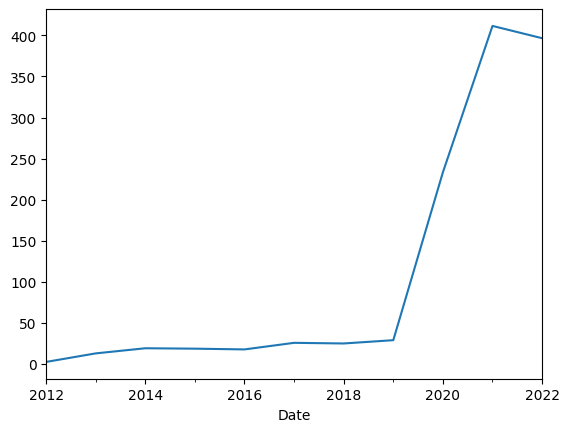

In [70]:
# rule A implies year end frequency
data.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

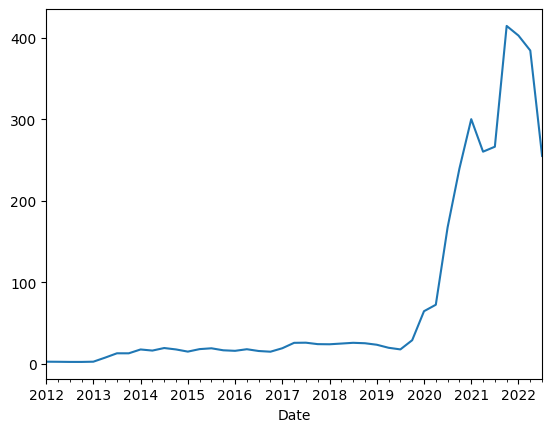

In [72]:
#quaterly start frequency
data.resample(rule='QS').max()['High'].plot()

<Axes: xlabel='Date'>

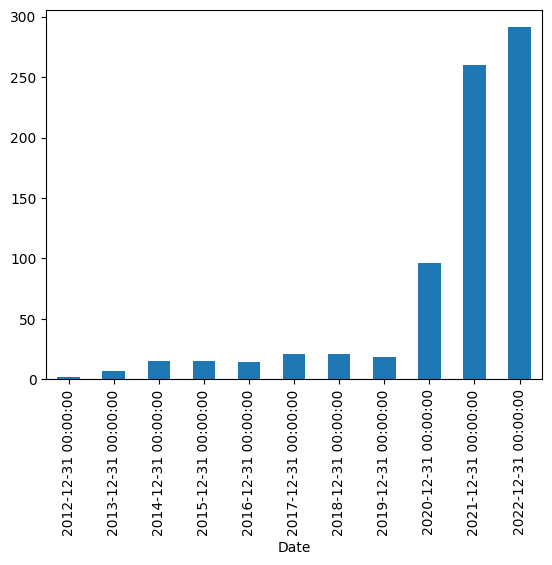

In [79]:
data['Open'].resample(rule='A').mean().plot(kind = 'bar')

In [87]:
data['High'].rolling( 10).mean()

Date
2012-03-12           NaN
2012-03-13           NaN
2012-03-14           NaN
2012-03-15           NaN
2012-03-16           NaN
                 ...    
2022-07-01    238.966333
2022-07-05    240.184000
2022-07-06    239.282668
2022-07-07    239.135667
2022-07-08    240.702000
Name: High, Length: 2599, dtype: float64

In [84]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,2.312667,2.419333,2.306667,2.400667,2.400667,29449500
2012-03-13,2.434000,2.439333,2.366667,2.406000,2.406000,15024000
2012-03-14,2.400000,2.400000,2.320000,2.352667,2.352667,12772500
2012-03-15,2.352000,2.365333,2.318667,2.333333,2.333333,8574000
2012-03-16,2.326667,2.392667,2.322000,2.354667,2.354667,10939500


In [88]:
data['Open :  30 Days Rolling'] = data['Open'].rolling(30).mean()

In [90]:
data.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open : 30 Days Rolling
Date,,,,,,,
2012-03-12,2.312667,2.419333,2.306667,2.400667,2.400667,29449500,NaN
2012-03-13,2.434000,2.439333,2.366667,2.406000,2.406000,15024000,NaN
2012-03-14,2.400000,2.400000,2.320000,2.352667,2.352667,12772500,NaN
2012-03-15,2.352000,2.365333,2.318667,2.333333,2.333333,8574000,NaN
2012-03-16,2.326667,2.392667,2.322000,2.354667,2.354667,10939500,NaN
2012-03-19,2.350667,2.354667,2.302667,2.332000,2.332000,15234000,NaN
2012-03-20,2.332000,2.346667,2.304667,2.330667,2.330667,8505000,NaN
2012-03-21,2.329333,2.353333,2.306667,2.343333,2.343333,9108000,NaN
2012-03-22,2.331333,2.343333,2.286667,2.293333,2.293333,7836000,NaN


<Axes: xlabel='Date'>

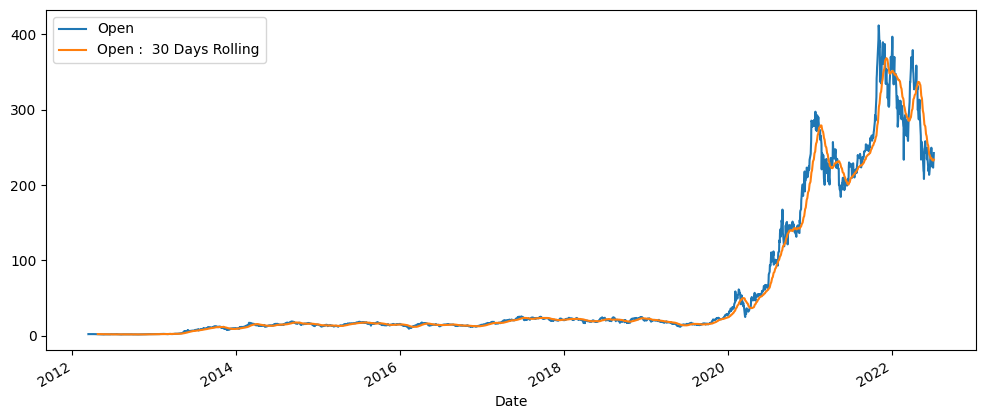

In [92]:
data[['Open' ,'Open :  30 Days Rolling']].plot(figsize = (12,5))